In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
df = pd.read_csv('Data/Data.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


#### Dataset description:
<br>**T** : Average Temperature (°C)
<br>**TM** : Maximum temperature (°C)
<br>**Tm** : Minimum temperature (°C)
<br>**SLP** : Atmospheric pressure at sea level (hPa)
<br>**H** : Average relative humidity (%)
<br>**VV** : Average visibility (Km)
<br>**V** : Average wind speed (Km/h)
<br>**VM** : Maximum sustained wind speed (Km/h)
<br>**PM 2.5** : Particle Matter which makes the air appear hazy

In [3]:
print("df.shape : ", df.shape)

df.shape :  (1093, 9)


In [4]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [7]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [8]:
# appying ffill as it fills with the null with last filled observation
df.fillna(method='ffill', inplace = True)

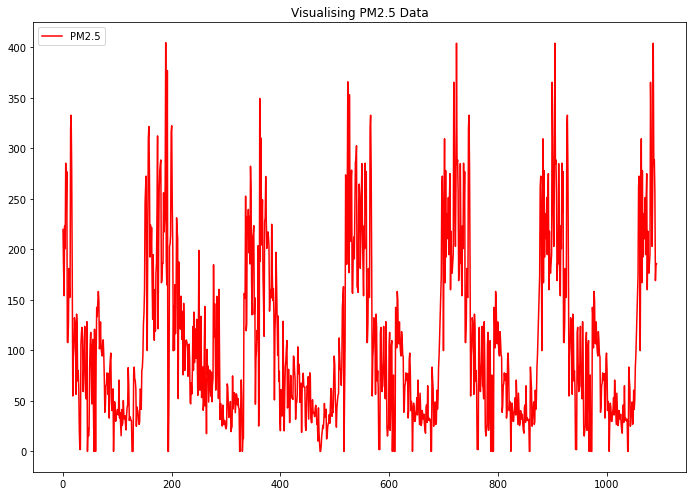

In [9]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values
sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

**There seems to be some repetiotions in the dataset after index 700, so lets check for duplicates in the dataset and remove them if any**

In [10]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


**So, there were 362 duplicate enteries in the dataset !**          
I'll remove them from the dataset

In [11]:
df = df[df.duplicated() == False]

print(df.shape)

(731, 9)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       731 non-null    float64
 1   TM      731 non-null    float64
 2   Tm      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  731 non-null    float64
dtypes: float64(9)
memory usage: 57.1 KB


All our features our numerical i.e in float datatype

In [13]:
df.describe().T #appying transpose for better display

,count,mean,std,min,25%,50%,75%,max
T,731.0,25.556908,7.286760,6.7,18.850000,27.700000,31.2000,38.5
TM,731.0,32.231874,6.852548,9.8,27.550000,34.100000,36.9000,45.5
Tm,731.0,19.273598,7.454202,0.0,12.000000,21.000000,25.9000,32.7
SLP,731.0,1008.196854,7.564601,991.5,1001.300000,1008.500000,1015.0000,1023.2
H,731.0,64.134063,15.460460,20.0,55.000000,66.000000,75.0000,98.0
VV,731.0,1.891929,0.686446,0.3,1.400000,1.900000,2.4000,5.8
V,731.0,6.630369,3.967064,0.4,3.500000,6.300000,9.1000,24.4
VM,731.0,15.696580,7.654019,1.9,11.100000,14.800000,18.3000,57.6
PM 2.5,731.0,108.036007,82.570588,0.0,43.583333,81.833333,154.0375,404.5


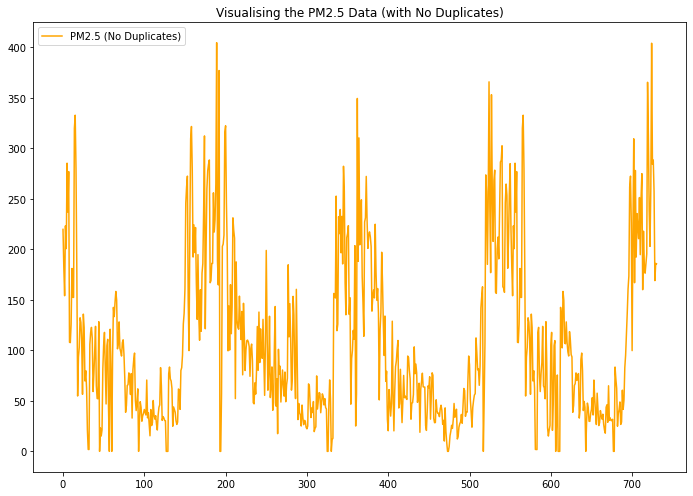

In [14]:
# Visualising the PM 2.5 Values with no duplicates

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()

## EDA

- Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.     
- Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing.

I will make a new binary feature `Acceptable`, its value will be **1** if the PM 2.5 lvl is acceptable and **0** if _not_.

In [15]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.head(10)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Acceptable
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833,0
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500,0
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500,0
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333,0
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833,0
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1,285.225000,0
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6,236.825000,0
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5,276.908333,0
8,12.7,18.9,7.3,1021.2,76.0,1.8,6.1,16.5,108.000000,1
9,11.9,18.9,6.3,1020.1,76.0,1.1,8.3,20.6,107.625000,1


1    536
0    195
Name: Acceptable, dtype: int64


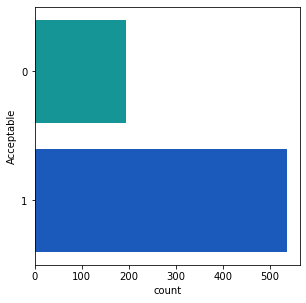

In [16]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75
print(df.Acceptable.value_counts())
sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

<mark>Out of the 731 days, **195** days had `unacceptable` PM 2.5 Levels</mark>

**Plot to see the relation between different climatical features and Acceptable PM2.5 lvls**

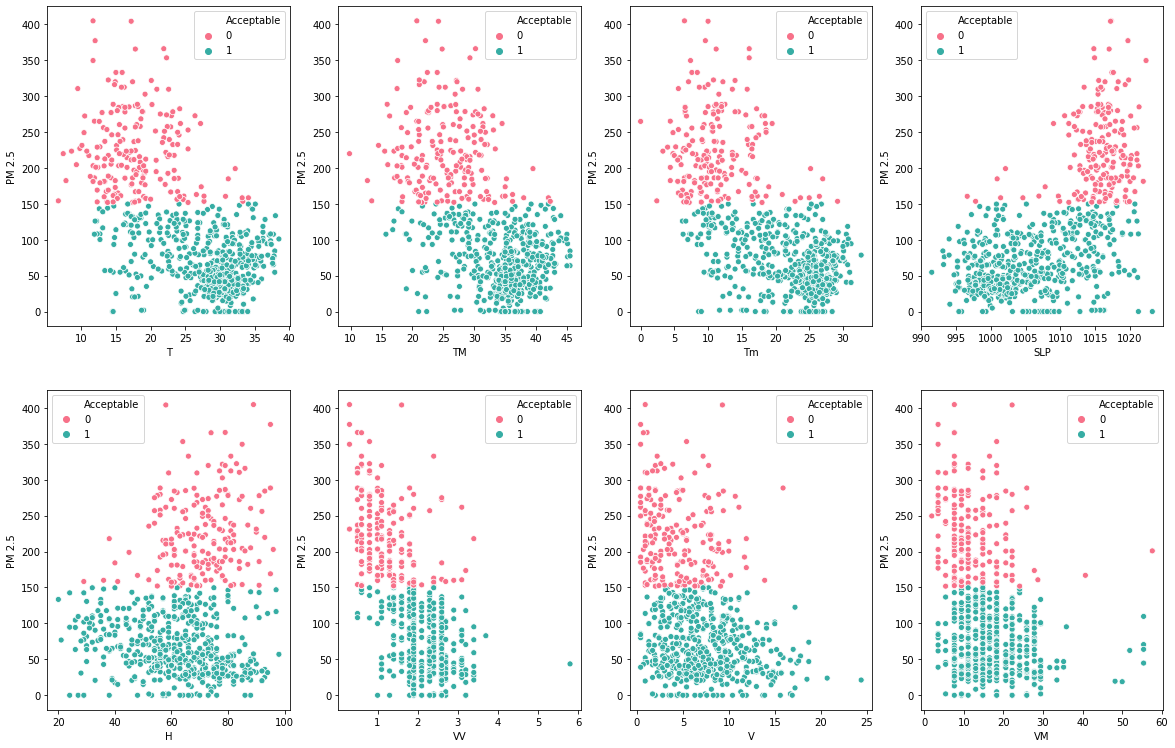

In [17]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "husl")

Except for `SLP`, not much was gained from this plt.  
- At higher SLP, the PM2.5 values tend to raise beyond the Acceptable lvl.

<mark>**Heatmap to see correlation between different features.**</mark>

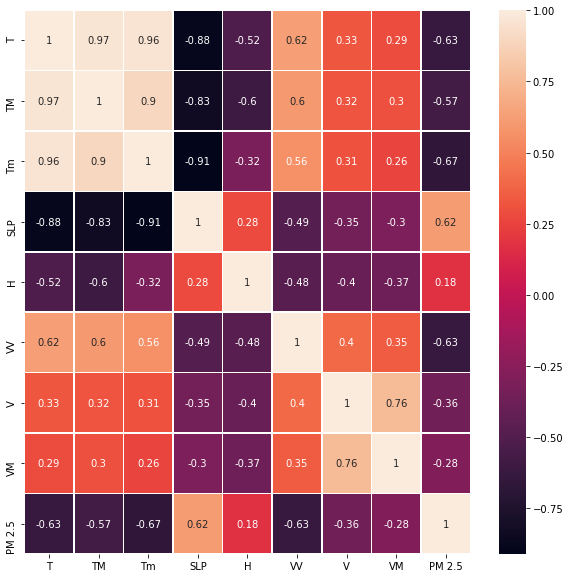

In [18]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

Once again we can see that _SLP_ is highly correlated with PM 2.5

## Prepairing Data for Model Preparation

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['PM 2.5', 'Acceptable'], axis=1)
y = df['Acceptable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
print(X.shape)
print(y.shape)

(731, 8)
(731,)


In [21]:
print('Length of X_train', len(X_train))
print('Length of X_test', len(X_test))
print('Length of y_train', len(y_train))
print('Length of y_test', len(y_test))

Length of X_train 584
Length of X_test 147
Length of y_train 584
Length of y_test 147


## Applying Linear Regression Algorithm:

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Lets evaluate the regression model

In [23]:
print("lr.score : ", lr.score(X_test, y_test))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.44529591850094585
lr.coef_ :  [-0.00403845  0.00431565  0.02913259  0.00136946  0.00261215  0.21689412
  0.00920437  0.00133022]
lr.intercept_ :  -1.9103045777961696


In [24]:
y_pred_train= lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [25]:
from sklearn import metrics
prediction = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))

MAE: 0.24490325274650462
MSE: 0.10447709804716325


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np
print ('RMSE value of training dataset:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print ('RMSE value of testing dataset:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE value of training dataset: 0.3066908093200249
RMSE value of testing dataset: 0.32322917264251266


### Since the RMSE values of both training and testing data are 
### within the acceptable limits i.e between 0.2 and 0.5 and there is no deviation
### MAE and MSE are also lower which indicates that
### our model can be considered as the best fit

#### Saving the Model as pickle file

In [27]:
import pickle
# open a file, where you ant to store the data
file = open('linear_reg_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)
file.close()